In [1]:
from ROOT import TMinuit
import numpy as np
import ROOT
import matplotlib.pyplot as plt
import ctypes

Welcome to JupyROOT 6.22/02


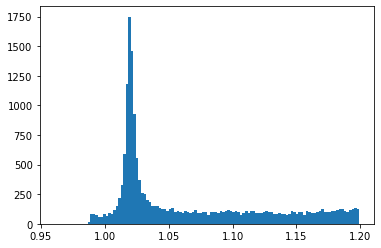

In [3]:
xExpt, yExpt = np.loadtxt('phiSpectrum.txt', unpack=True)
plt.hist(xExpt, weights=yExpt, bins=len(xExpt))
plt.show()

In [28]:
def func(x, par):
    m_K = 0.493
    A = par[0]
    m_phi = par[1]
    g0 = par[2]
    p0 = np.sqrt(np.square(m_phi/2) - np.square(m_K))
    p = np.sqrt(np.square(x/2) - np.square(m_K))
    g_phi = (m_phi/x) * g0 * np.power(p/p0, 3)
    BW = A*(x*m_phi*g_phi)/(np.square(np.square(x) - np.square(m_phi)) + np.square(m_phi*g_phi))
    
    alpha = par[3]
    beta = par[4]
    BG = alpha*np.power(x - 2*m_K, beta) if x >= 2*m_K else 0
    
    return BW + BG

actPar = [5000, 20., 90., -0.2, 60.]
rnd = ROOT.TRandom3()
nChan = 120
    
nPar = 5
dx = xExpt[1] - xExpt[0]
# Area, g, x0, a_bg, b_bg = 5000, 20., 90., -0.2, 60.
indPos = yExpt > 0
nPos = indPos.sum()
    
# CHI-SQUARED
def FCN(npar, gin, f, par, iflag):
    global valFCN
    yTheor = np.array([func(i, par) for i in xExpt]) 
    indPos = yExpt > 0
    arrayFCN = np.square(yExpt[indPos] - yTheor[indPos])/yExpt[indPos]
    valFCN = np.sum(arrayFCN)
    f.value = valFCN
    
# BINNED MAXIMUM LIKELIHOOD
def FCN2(npar, gin, f, par, iflag):
    global valFCN
    yTheor = np.array([func(i, par) for i in xExpt])
    indPos = yExpt > 0
    fi = yTheor[indPos]
    di = yExpt[indPos]
    fi = np.where(fi < 0, 1, fi)
#     arrayFCN = fi - di * np.log(fi)
    arrayFCN = (fi - di) - di * np.log(fi/di)
    valFCN = np.sum(arrayFCN)
    f.value = valFCN

In [5]:
minuit = ROOT.TMinuit(5)
minuit.SetPrintLevel(1)
minuit.SetFCN(FCN)
errordef = 1.

minuit.DefineParameter(0, 'Area', 1e3, 1e-2, 0., 0.)
minuit.DefineParameter(1, 'm_phi', 1., 1e-4, 0., 0.)
minuit.DefineParameter(2, 'g0', 1, 1e-4, 0., 0.)
minuit.DefineParameter(3, 'a_bg', 0.1, 1e-4, 0., 0.)
minuit.DefineParameter(4, 'b_bg', 2, 1e-4, 0., 0.)

ierflg = ctypes.c_int(0)
minuit.mncomd("SET ERR " + str(1), ierflg)
minuit.mncomd("SET STR 1", ierflg)
minuit.mncomd("MIGRAD 10000 1e-8", ierflg)

ndf = nChan - minuit.GetNumFreePars()
print("Chi/ndf = ", valFCN/ndf)

valPar = ctypes.c_double(0)
errPar = ctypes.c_double(0)

parFit = np.zeros(5)
parErr = np.zeros(5)

for i in range(nPar):
    minuit.GetParameter(i, valPar, errPar)
    parFit[i] = valPar.value
    parErr[i] = errPar.value

<ipython-input-4-fe42b8cd8573>:7: RuntimeWarning: invalid value encountered in sqrt
  p = np.sqrt(np.square(x/2) - np.square(m_K))
<ipython-input-4-fe42b8cd8573>:13: RuntimeWarning: overflow encountered in power
  BG = alpha*np.power(x - 2*m_K, beta) if x >= 2*m_K else 0


Chi/ndf =  1.9813290609096472
 **********
 **    1 **SET PRINT           1
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 Area         1.00000e+03  1.00000e-02     no limits
     2 m_phi        1.00000e+00  1.00000e-04     no limits
     3 g0           1.00000e+00  1.00000e-04     no limits
     4 a_bg         1.00000e-01  1.00000e-04     no limits
     5 b_bg         2.00000e+00  1.00000e-04     no limits
 **********
 **    2 **SET ERR            1
 **********
 **********
 **    3 **SET STR            1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **    4 **MIGRAD        1e+04       1e-08
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRATEGY  1.  CONVERGENCE WHEN EDM .LT. 1.00e-11
 FCN=1.86485e+07 FROM MIGRAD    STATUS=INITIATE       39 CALLS          40 TOTAL
                     EDM= unknown      STRATEGY= 1      NO ERROR MATRIX 

In [29]:
minuit.SetFCN(FCN2)
errordef = 1.
    
minuit.DefineParameter(0, 'Area', 10, 1e-2, 0., 0.)
minuit.DefineParameter(1, 'm_phi', 1., 1e-4, 0., 0.)
minuit.DefineParameter(2, 'g0', 6e-3, 1e-4, 0., 0.)
minuit.DefineParameter(3, 'a_bg', 1e2, 1e-4, 0., 0.)
minuit.DefineParameter(4, 'b_bg', 2e-1, 1e-4, 0., 0.)

ierflg = ctypes.c_int(0)
minuit.mncomd("SET ERR " + str(1), ierflg)
minuit.mncomd("SET STR 1", ierflg)
minuit.mncomd("MIGRAD 10000 1e-8", ierflg)

ndf = 120 - minuit.GetNumFreePars()
print("Chi/ndf = ", valFCN/ndf)

valPar = ctypes.c_double(0)
errPar = ctypes.c_double(0)

parFit2 = np.zeros(5)
parErr2 = np.zeros(5)

for i in range(nPar):
    minuit.GetParameter(i, valPar, errPar)
    parFit2[i] = valPar.value
    parErr2[i] = errPar.value

<ipython-input-28-e87c48b05aff>:7: RuntimeWarning: invalid value encountered in sqrt
  p = np.sqrt(np.square(x/2) - np.square(m_K))


Chi/ndf =  0.9642412123879772
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 Area         1.00000e+01  1.00000e-02     no limits
     2 m_phi        1.00000e+00  1.00000e-04     no limits
     3 g0           6.00000e-03  1.00000e-04     no limits
     4 a_bg         1.00000e+02  1.00000e-04     no limits
     5 b_bg         2.00000e-01  1.00000e-04     no limits
 **********
 **   20 **SET ERR            1
 **********
 **********
 **   21 **SET STR            1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **   22 **MIGRAD        1e+04       1e-08
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRATEGY  1.  CONVERGENCE WHEN EDM .LT. 1.00e-11
 FCN=523.175 FROM MIGRAD    STATUS=INITIATE       56 CALLS       12854 TOTAL
                     EDM= unknown      STRATEGY= 1      NO ERROR MATRIX       
  EXT PARAMETER               CURRENT GUESS       STEP

<ipython-input-28-e87c48b05aff>:7: RuntimeWarning: invalid value encountered in sqrt
  p = np.sqrt(np.square(x/2) - np.square(m_K))
<ipython-input-28-e87c48b05aff>:8: RuntimeWarning: divide by zero encountered in double_scalars
  g_phi = (m_phi/x) * g0 * np.power(p/p0, 3)


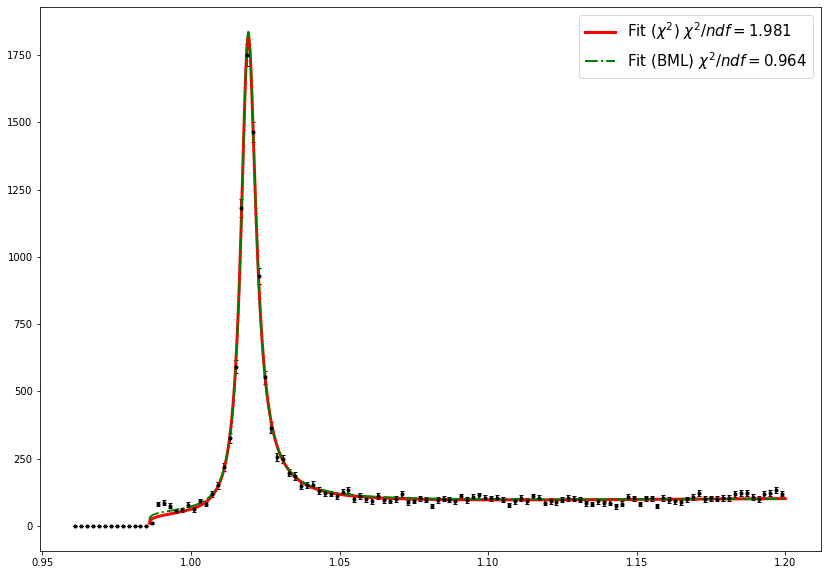

In [32]:
xx = np.linspace(0, 1.2, 10000)
yy = [func(i, parFit) for i in xx]
yy3 = [func(i, parFit2) for i in xx]

plt.figure(figsize=(14,10))

# plt.plot(xExpt, yExpt, '.', color='black', label='Data')
plt.errorbar(xExpt, yExpt, np.sqrt(yExpt), fmt='.', color='black', capsize=2)
plt.plot(xx, yy, color='r', lw=3, label=r'Fit ($\chi^2$) $\chi^2/ndf = 1.981$')
plt.plot(xx, yy3, '-.' ,color='g', lw=2, label=r'Fit (BML) $\chi^2/ndf = 0.964$')

plt.legend(fontsize=15)

plt.show()